# 用基于ReLU的神经网络拟合sinx

In [23]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

### 神经网络类Network（3层）

In [24]:
class Network(nn.Module):
#传入参数：各层神经元数
    #初始化
    def __init__(self, n_in, n_hidden1, n_hidden2, n_out):
        super().__init__()
        self.layer1 = nn.Linear(n_in, n_hidden1)#输入层和隐藏层1之间的线性层
        self.layer2 = nn.Linear(n_hidden1, n_hidden2)#隐藏层1和隐藏层2之间的线性层
        self.layer3 = nn.Linear(n_hidden2, n_out)#隐藏层2和输出层之间的线性层
        
    #前向传播 
    def forward(self, x):
        x_1 = self.layer1(x)
        x_1 = torch.relu(x_1)#relu激活
        x_2 = self.layer2(x_1)
        x_2 = torch.relu(x_2)#relu激活
        return self.layer3(x_2)

### 生成训练集

In [25]:
x = np.linspace(0., 2*np.pi, 1000)#随机生成1000个数据
y = np.sin(x)
#对xy进行格式转换，便于后续操作
x = x.reshape(1000, 1)
y = y.reshape(1000, 1)
model = Network(1, 20, 20, 1)#定义一个3层的神经网络model
x_tensor=torch.from_numpy(x)
x_tensor = x_tensor.to(model.layer1.weight.dtype)
y_tensor=torch.from_numpy(y)

In [26]:
criterion = nn.MSELoss()# 创建均方误差损失函数
optimizer = torch.optim.Adam(model.parameters())# Adam优化器

### 循环迭代

step: 0, loss: 0.636036217212677


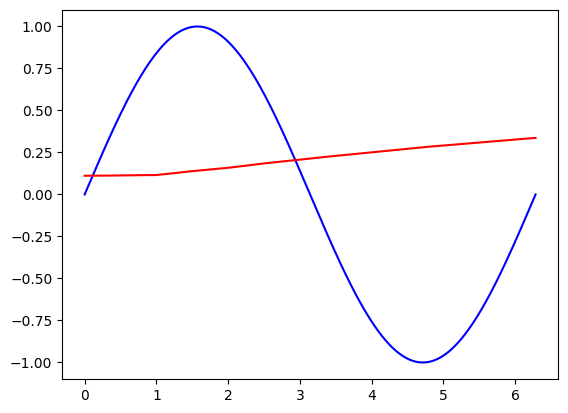

step: 1000, loss: 0.01819700002670288


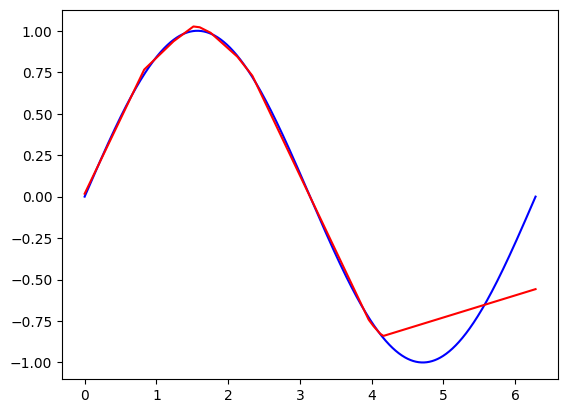

step: 2000, loss: 0.00024053233209997416


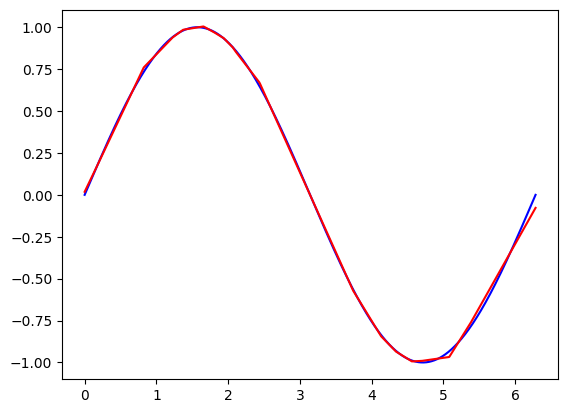

step: 3000, loss: 5.9658970712916926e-05


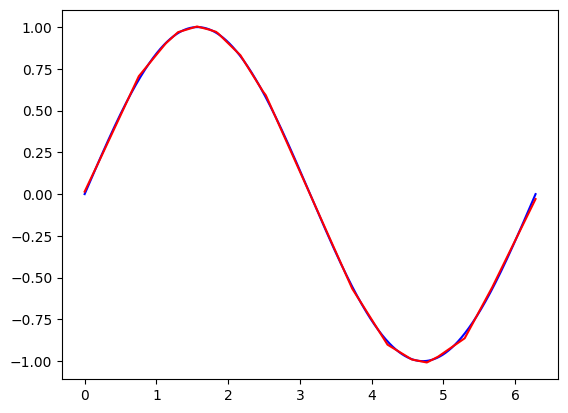

step: 4000, loss: 3.5643675801111385e-05


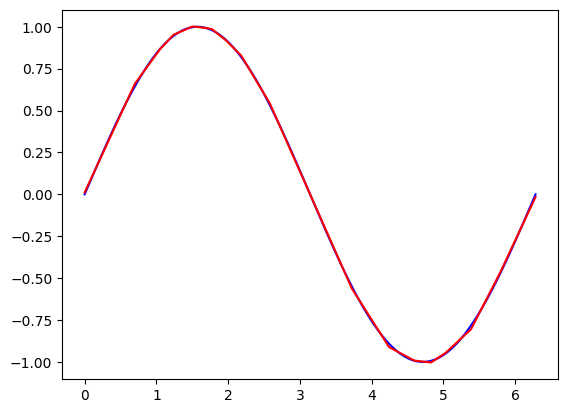

step: 5000, loss: 2.6532750780461356e-05


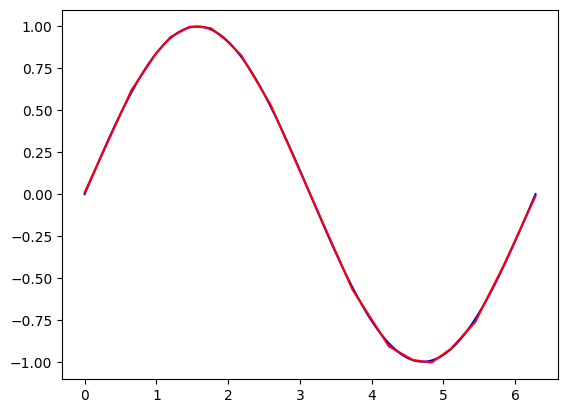

In [27]:
for step in range(5001):
    y_out = model(x_tensor)#预测
    y_out = y_out.to(torch.float32)#转换数据类型
    y_tensor = y_tensor.to(torch.float32)
    loss = criterion(y_out, y_tensor)
    loss.backward()#计算损失函数关于模型参数的梯度
    optimizer.step()#更新参数，使损失函数减小
    optimizer.zero_grad()#将梯度清零，便于下一次迭代
    #每迭代1000次输出一次
    if step % 1000 == 0:
        print(f'step: {step}, loss: {loss.item()}')
        x = x_tensor.data.numpy()
        y_out = y_out.data.numpy()
        plt.plot(x, y, 'b', x, y_out, 'r')
        plt.show()

### 测试集与预测结果比较

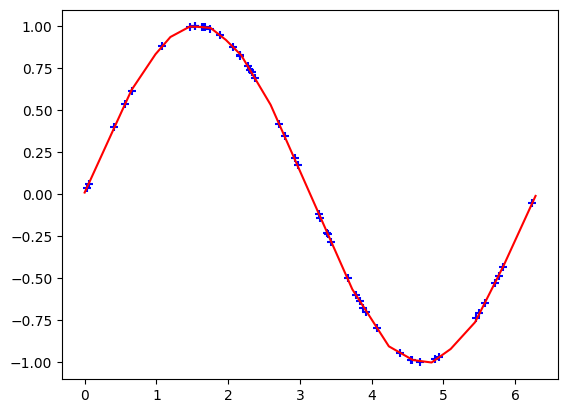

In [28]:
x_test = np.random.random(50)*np.pi*2
y_test = np.sin(x_test)
plt.scatter(x_test, y_test, c='b',marker='+')
plt.plot(x, y_out, 'r')
plt.show()